<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1> Sesión 7. Evaluación de modelos</header1></centre>

Miller Janny Ariza Garzón <br>
Abril 2022

___

## Evaluación


La evaluación es una de las tareas necesarias en los procesos de modelación. Permite elegir entre diferentes opciones, determinar si un modelo es adecuado o no para un problema en específico y hacer monitoreo y control, entre otras tareas. Los modelos son tan útiles como la calidad de sus predicciones; por lo tanto, el objetivo no es crear modelos, sino crear modelos de alta calidad con poder predictivo. A continuación listamos algunos de los apsectos a tenber en cuenta en los proceso de evaluación.

+ Metrics-loss function 
+ Bias
+ Variance
+ Robustness 
+ Stability. Model drift.
+ Operational-Business applicable.
+ Interpretability

Un libro que permite estudiar algunos elementos asociados con el proceso de evaluación es:
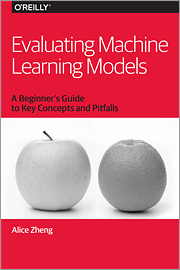

## Métricas


En [scikit-learn](https://scikit-learn.org/stable/) están programadas varias [métricas](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), las cuales pueden ser usadas para la evaluación de modelos supervisados y no supervisados. Para el caso de modelos supervisados, las métricas varian dependiendo de la naturaleza de la variable objetivo; esto es, regresión o clasificación.

Un resumen de diferentes métricas con su explicación se puede encontrar en este [enlace](https://github.com/neptune-ai/blog-binary-classification-metrics/blob/master/binary_classification_metrics_cheathsheet.pdf).

Un paper que muestra algunas de las métricas más utlizadas en modelos no supervisados se encuentra en este [enlace](https://arxiv.org/pdf/1905.05667.pdf).

### En Regresión


La tasa de error de un modelo predictivo puede evaluarse aplicando varias métricas derivadas de funciones de perdida en ML y en estadística. El concepto básico de la evaluación de la precisión en el análisis de regresión consiste en comparar la variable objetivo con la predicha.
Recordamos como hallar algunas de las métricas más usadas:

+ $RMSE=\frac{1}{N}\sqrt{\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^2}$, Root Mean Squared Error

+ $R^{2}=1-\frac{\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{N}(y_{i}-\bar{y})^{2}}$, R-squared (Coefficient of determination) 

+ $MAPE=\frac{1}{N}\sum_{i=1}^{N}\left|\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right|$, Mean absolute percentage error


### En Clasificación

><figure><center>
  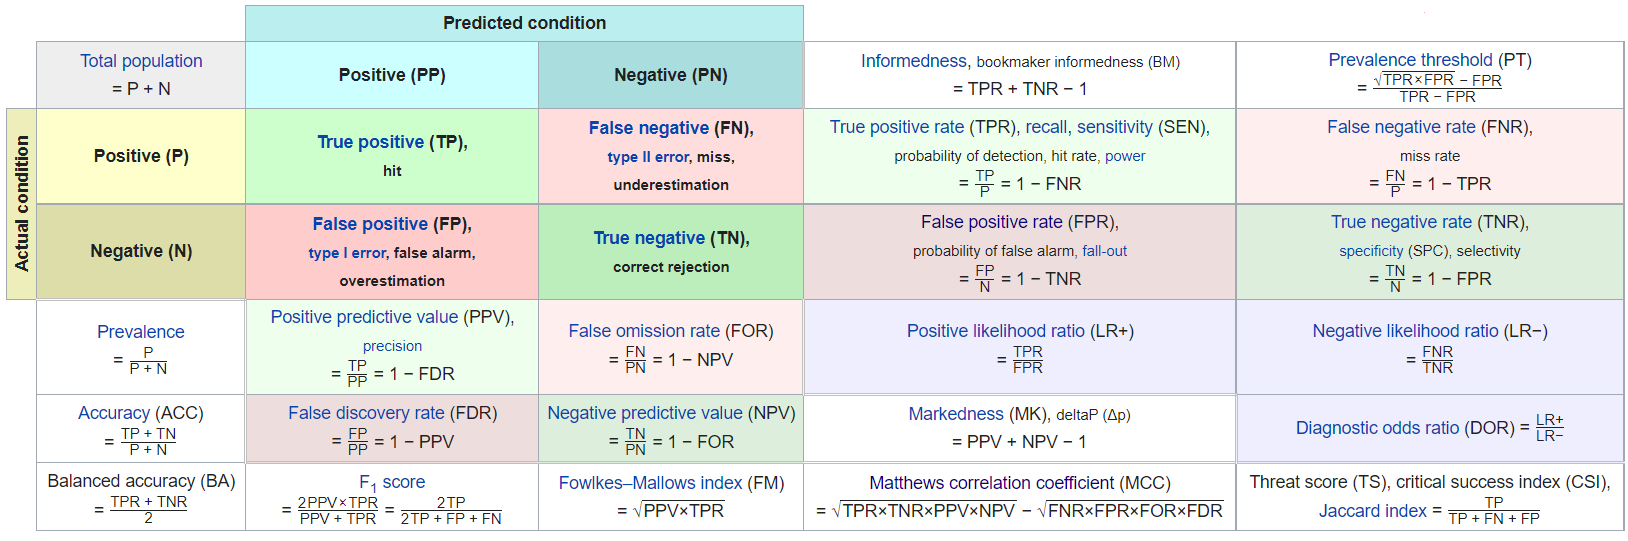
  <figcaption> Matriz de Clasifiación o de confusión. Medidas de clasificación. Source:<a href="https://en.wikipedia.org/wiki/F-score"> Wiki </a></figcaption></figure></center> 

><figure><center>
  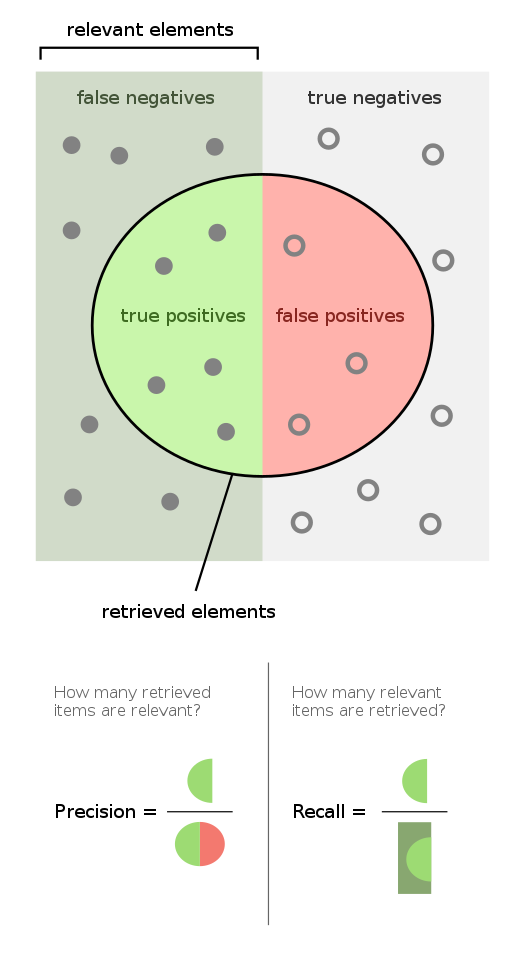
></figure></center> 

+ $\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$, Representa la tasa general de predicciones correctas.  


+ $\text{Precision} = \frac{TP}{TP+FP}$,Representa la tasa de acierto de una clase pronósticada.  


+ $\text{Recall}=\text{Sensitivity} = \frac{TP}{TP+FN}$, Representa la tasa de predicción correcta de una clase concreta. 


+ $\text{F1} = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$, Es la media armónica entre la precisión y recall. 


+ $\text{BACC}=\frac{TPR+TNR}{2}$, Promedio entre sensibilidad y especificidad. Útil en problemas de class imbalance.

> Hay una medida que ha venido tomando fuerza y es el MCC. Tiene en cuenta los cuatro valores de la matriz de confusión, y un valor alto, cercano a 1, significa que ambas clases se predicen bien, incluso si una clase está desproporcionadamente infra (o sobre) representada, (problema de class imbalance).


#### AUC-ROC
><figure><center>
  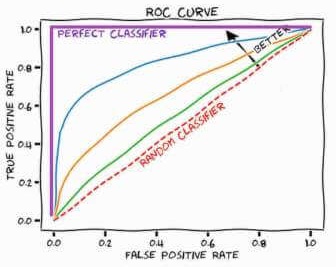
</figure></center> 

**AUC-ROC**: Una curva ROC es una representación gráfica de relación entre (sensibilidad=TPR) y (1-especificidad=FPR) cuando el punto de corte cambia. Representa el grado o medida de separabilidad. Es la medida de la capacidad de un clasificador para distinguir entre clases y se utiliza como resumen de la curva ROC. Cuanto mayor sea el AUC, mejor será el modelo para predecir las clases 0 como 0 y las clases 1 como 1. 
AUC-ROC se utliza frecuentemente y no está exenta de problemas; en el caso de class imbalance su resultado podría ser engañoso. Una curva ROC puede seguir pareciendo buena, mejor que la aleatoria, mientras clasifica erróneamente la mayor parte o la totalidad de la clase minoritaria. En este [enlace](https://www.bioestadistica.uma.es/analisis/roc1/) podemos probar con diferentes puntos de corte para comprender la construcción de la curva ROC.

## Sesgo y Varianza (Bias-variance tradeoff)

**Sesgo** es el error (perdida) esperado en las predicciones de un modelo.Es el error en el que incurrimos debido a las suposiciones del modelo (lineal, árbol de decisión con 5 nodos, una red neuronal de tres capas y dos  neuronas por capa, ...). Tener un sesgo alto significa que el modelo presenta underfitting; es decir, cuando su desempeño en predicción es bajo en los datos de entrenamiento. Esto se debe a que el modelo es incapaz de capturar la relación entre la variable de de entrada  y los variable objetivo.
Con alto sesgo ambos error con datos de entrenamiento y datos de evaluación (test) pueden ser altos. 

La **varianza** escribe en qué medida el mejor modelo depende del conjunto de entrenamiento. Es decir, la varianza cuantifica la diferencia en las predicciones, al cambiar un conjunto de datos.
la varianza aumenta cuando los modelos se vuelven más complejos y disminuye con conjuntos de entrenamiento más grandes. La obtención de una alta varianza significa que el modelo presenta overfitting. El modelo presenta overfitting cuando el modelo funciona bien con los datos de entrenamiento pero no lo hace con los datos de evaluación. Esto se debe a que el modelo está memorizando los datos que ha utlizado para ajuste y es incapaz de generalizar a ejemplos no utilizados. El modelo está capturando patrones en los datos de entrenamiento causados por el azar en lugar de las verdaderas propiedades de la función subyacente.
En casos de alta varianza el error de entrenamiento puede ser bajo pero el error en el conjunto de evaluación (test) puede ser alto.

> Error = bias + variance + (noise)

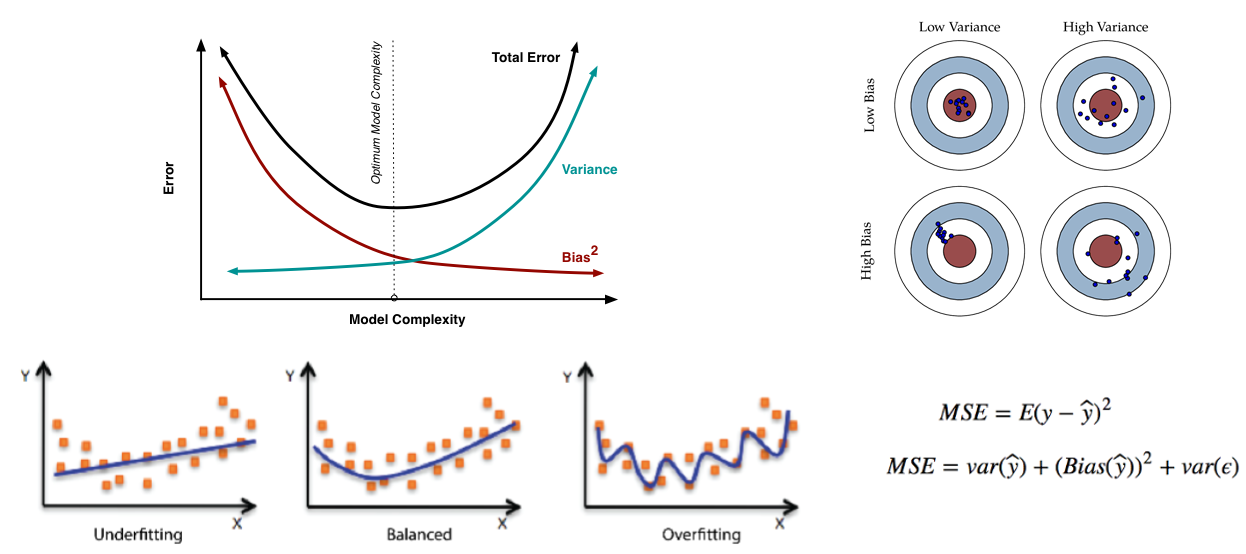

+ Ensemble methods reduce la varianza. (stacking, bagging and boosting)
+ En DT al aumentar la profundidad se reduce el sesgo y se aumenta la varianza.
+ En ANN, los modelos más profundos pueden aumentar la varianza, pero disminuir el sesgo.
+ En KNN por lo general al aumentar K se reduce la varianza y se aumenta el sesgo.

> Se debe buscar como propósito de modelación un equilibrio entre el sesgo y la varianza (Bias-variance tradeoff). 

## Cross validation

Es una técnica que permite evaluar mejor la predicción de un modelo reconociendo sesgo y varianza. La evaluación será independiente de los datos de entrenamiento y prueba, permitiendo evaluar con mayor certeza la generalización y aplicación del modelo. Es decir, la validación cruzada permite probar la capacidad de un modelo para predecir nuevos datos. Se utiliza para detectar problemas como overfitting o el sesgo de selección, y proporciona información sobre cómo se generalizará el modelo en un conjunto de datos independiente.


Por lo general, en la validación cruzada, se establece un número fijo particiones (folds) de los datos, se ejecuta el análisis en cada fold y luego se promedia la estimación global del error. Con cada fold se tendrán datos de entrenamiento y de test. Es decir, para conocer el error real de un modelo, hay que probarlo con datos que nunca ha utlizado antes, y a este conjunto de datos suele llamarse conjunto de prueba (Test).

### Tipos de CV



> + Holdout method (Simple)

<figure><center>
  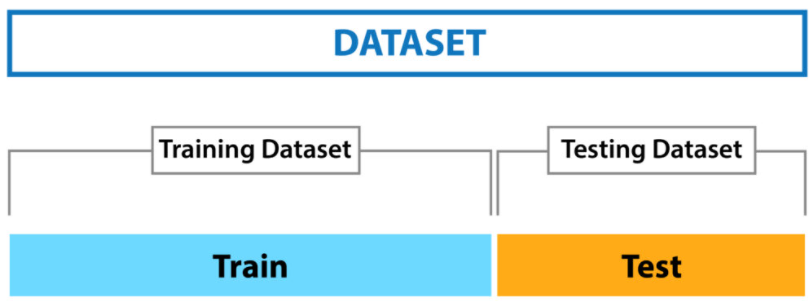
</figure></center> 

> + Leave-one-out Method (LOOCV)

<figure><center>
  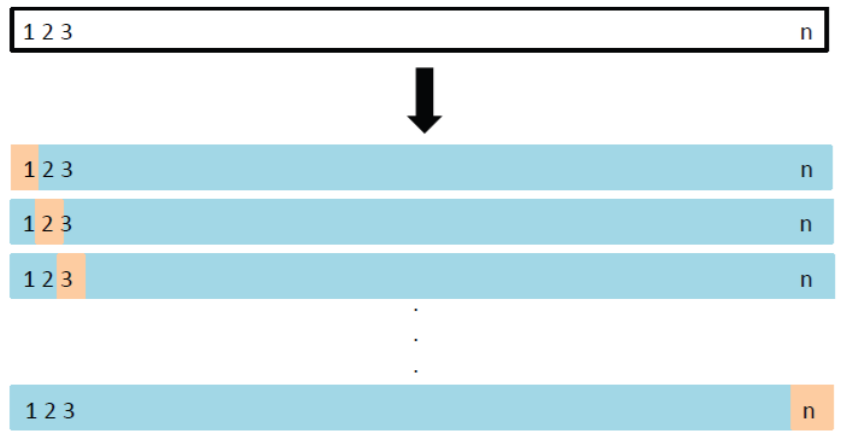
</figure></center> 

> + K-Folds Method

<figure><center>
  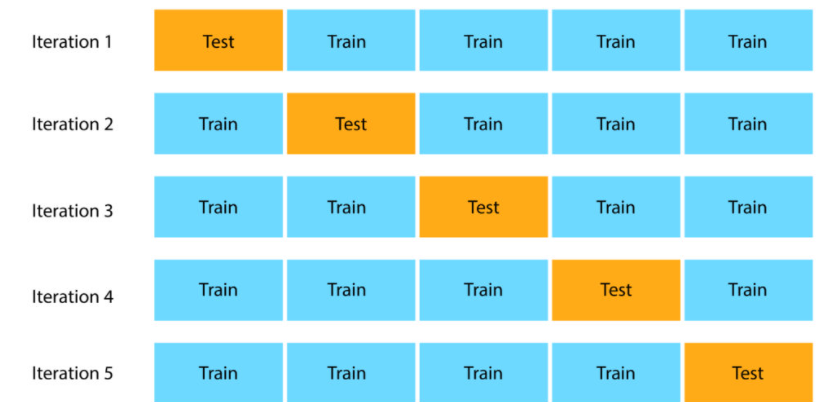
</figure></center> 

> + Stratified K-Folds Method

<figure><center>
  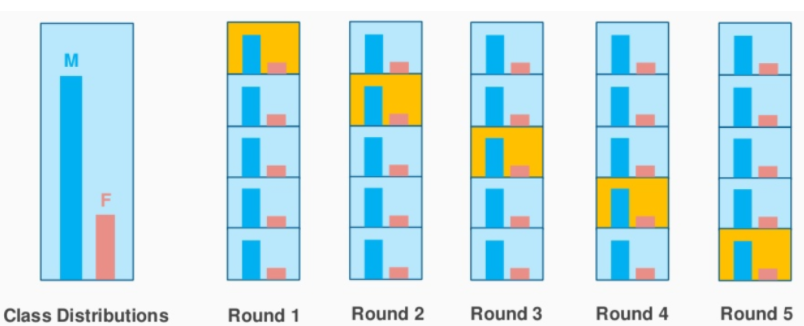
</figure></center> 

> + ShuffleSplit Method

<figure><center>
  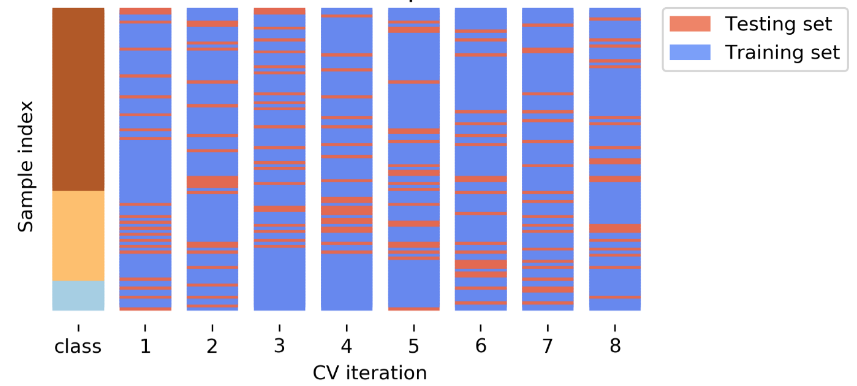
</figure></center> 

Otros tipos de cross validation se pueden encontrar en este [enlace](https://medium.com/geekculture/cross-validation-techniques-33d389897878).

## Caso Regresión

In [7]:
import pandas as pd
import category_encoders as ce
df_starup = pd.read_csv(r"startup-logistic-regression\50_Startups.csv")
encoder=ce.OneHotEncoder(cols=['State'],handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_starup_enc = encoder.fit_transform(df_starup)
df_starup_enc.head()

,R&D Spend,Administration,Marketing Spend,State_New York,State_California,State_Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


In [147]:
# SIMPLE. Enfoque de validación de HoldOut

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error 
X_train, X_test, y_train, y_test = train_test_split(df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit'], test_size=0.1, random_state=0)
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
preds_test= model.predict(X_test)

print('R2 Score Test : %.3f' % r2_score(y_test, preds_test))
print('RMSE Test : %.3f' % mean_squared_error(y_test, preds_test, squared=False))
print('MAPE Score : %.3f' % mean_absolute_percentage_error(y_test, preds_test))

R2 Score Test : 0.987
RMSE Train : 4461.119
MAPE Score : 0.024


In [8]:
# K Fold Cross Validation DTR

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
model = DecisionTreeRegressor(random_state=0)
kfold_validation=KFold(10)
results_rmse=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_mean_absolute_percentage_error')
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

RMSE: 17701.681 (9232.011)
MAPE: 0.230 (0.352)


In [9]:
# K Fold Cross Validation RFR

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
model = RandomForestRegressor(n_estimators=10, random_state=0)
kfold_validation=KFold(10)
results_rmse=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_mean_absolute_percentage_error')
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

RMSE: 16437.409 (9160.950)
MAPE: 0.225 (0.357)


In [10]:
#Leave One Out Cross Validation(LOOCV)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=10, random_state=0)

X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
leaveOO_validation=LeaveOneOut()
results_rmse=-cross_val_score(model,X,y,cv=leaveOO_validation, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=leaveOO_validation, scoring='neg_mean_absolute_percentage_error')
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

RMSE: 8751.742 (7950.097)
MAPE: 0.155 (0.457)


In [157]:
# ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
shufleS=ShuffleSplit(n_splits=10,test_size=0.1)
model = RandomForestRegressor(n_estimators=10, random_state=0)

results_r2=cross_val_score(model,X,y,cv=shufleS, scoring='r2')
results_rmse=-cross_val_score(model,X,y,cv=shufleS, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=shufleS, scoring='neg_mean_absolute_percentage_error')
print("R2: %.3f (%.3f)" % (results_r2.mean(), results_r2.std()))
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

R2: 0.819 (0.201)
RMSE: 11729.372 (4598.993)
MAPE: 0.219 (0.232)


## Caso Clasificación

In [11]:
import pandas as pd

df_credit = pd.read_csv('data_credit')
df_credit=df_credit[['Default', 'emp_length_n', 'dti_n', 'revenue', 'loan_amnt', 'fico_n',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_n_MORTGAGE', 'home_ownership_n_OTHER',
       'home_ownership_n_OWN', 'home_ownership_n_RENT']]
df_credit=df_credit.groupby('Default', group_keys=False).apply(lambda x: x.sample(1000, random_state=123))
#df_credit['Default'].value_counts()
df_credit['Default'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Default, dtype: float64

In [259]:
# SIMPLE. Enfoque de validación de HoldOut
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(df_credit.drop(labels=['Default', ], axis=1),df_credit['Default'], test_size=0.2, random_state=0, stratify=df_credit['Default'])

#model = DecisionTreeClassifier(random_state=1)
model = RandomForestClassifier(n_estimators=20, random_state=101)

model.fit(X_train, y_train)
preds_test= model.predict(X_test)
prob_test= model.predict_proba(X_test)[:,1]

print('ACC : %.3f' % accuracy_score(y_test, preds_test))
print('Precision  : %.3f' %  precision_score(y_test, preds_test))
print('Recall : %.3f' % recall_score(y_test, preds_test))
print('BACC : %.3f' % balanced_accuracy_score(y_test, preds_test))
print('F1-Score : %.3f' % f1_score(y_test, preds_test))
print('AUC-ROC : %.3f' % roc_auc_score(y_test, prob_test))
print('MCC : %.3f' % matthews_corrcoef(y_test, preds_test))


ACC : 0.570
Precision  : 0.576
Recall : 0.530
BACC : 0.570
F1-Score : 0.552
AUC-ROC : 0.602
MCC : 0.140


Text(0.5, 1.0, 'ROC curve and KS')

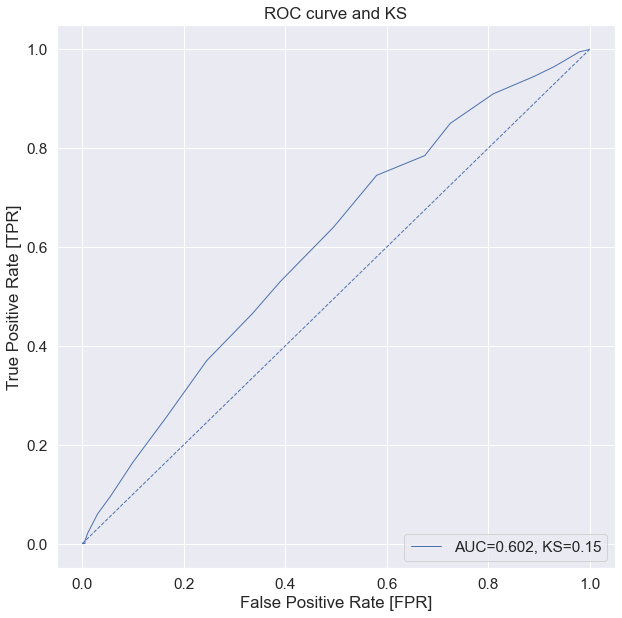

In [308]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

prob_test = model.predict_proba(X_test)[:,1]
      
fpr, tpr, threshold = roc_curve(y_test, prob_test)
roc_auc = round(auc(fpr, tpr),3)
KS= round(ks_2samp(fpr, tpr)[0],3) 

fig = plt.figure(figsize=(10,10)) # Init figure
plt.plot(fpr, tpr, 'b', linewidth=1, label="AUC="+str(roc_auc)+", KS="+str(KS)) # Plot ROC Curve
plt.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), linewidth=1,linestyle='dashed') # Plot dashed guess line
plt.legend(loc=4)
plt.xlabel('False Positive Rate [FPR]')
plt.ylabel('True Positive Rate [TPR]')
plt.title('ROC curve and KS')  

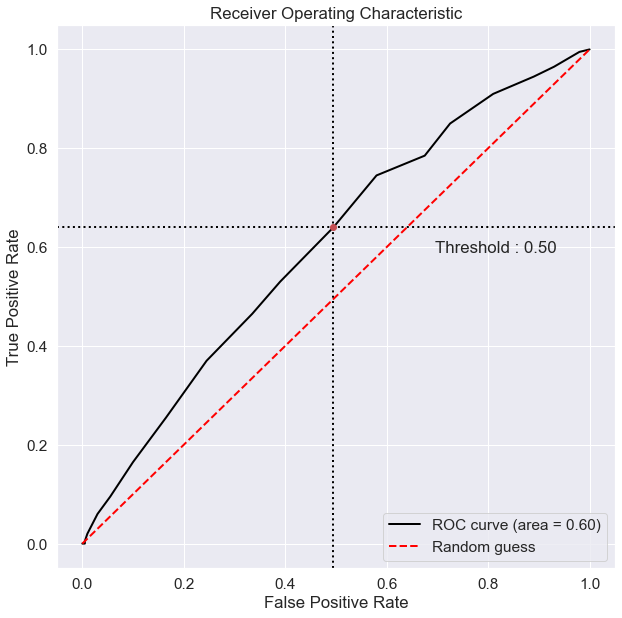

In [309]:
#! pip install plot-metric
#https://plot-metric.readthedocs.io/en/latest/
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, prob_test, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

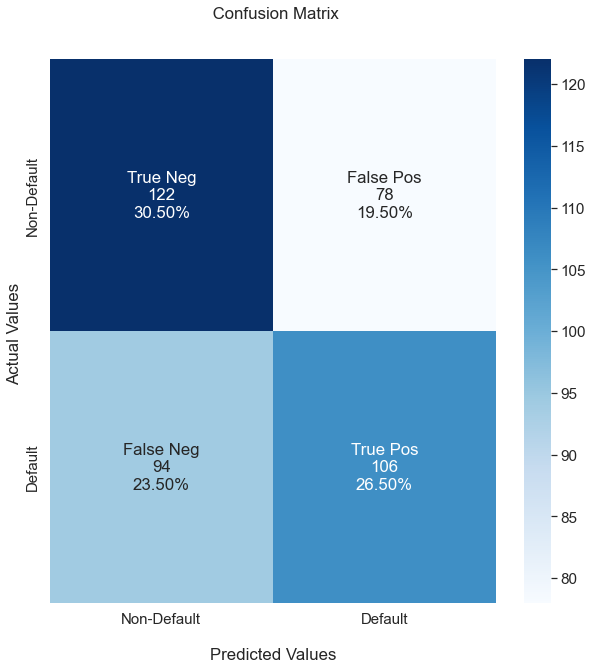

In [306]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, preds_test)

#print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(10,10))  
sns.set(font_scale=1.4)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title(' Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - 
ax.xaxis.set_ticklabels(['Non-Default','Default'],fontsize = 15)
ax.yaxis.set_ticklabels(['Non-Default','Default'],fontsize = 15)

## Display the visualization of the Confusion Matrix.
plt.show()

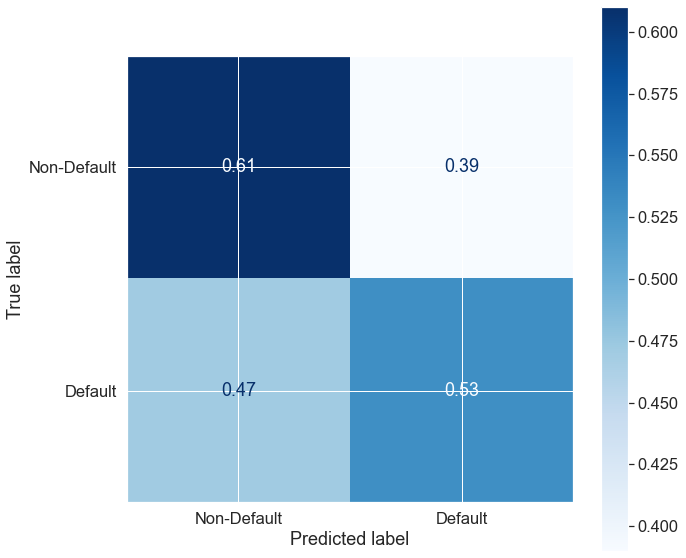

In [298]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

CM=confusion_matrix(y_test, preds_test,  normalize='true')#normalize{‘true’, ‘pred’, ‘all’}, default=None

CMD=ConfusionMatrixDisplay(CM,display_labels=['Non-Default','Default'])
fig, ax = plt.subplots(figsize=(10,10))
CMD.plot(ax=ax,cmap='Blues')


In [247]:
# K Fold Cross Validation 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X, y= df_credit.drop(labels=['Default', ], axis=1),df_credit['Default']
model = RandomForestClassifier(n_estimators=20, random_state=101)
kfold_validation=KFold(5)

results_BACC=cross_val_score(model,X,y,cv=kfold_validation, scoring='balanced_accuracy')
results_F1=cross_val_score(model,X,y,cv=kfold_validation, scoring='f1')

print("BACC: %.3f (%.3f)" % (results_BACC.mean(), results_BACC.std()))
print("F1: %.3f (%.3f)" % (results_F1.mean(), results_F1.std()))

BACC: 0.359 (0.112)
F1: 0.275 (0.229)


In [248]:
# Stratified K-fold Cross Validation
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X, y= df_credit.drop(labels=['Default', ], axis=1),df_credit['Default']
model = RandomForestClassifier(n_estimators=20, random_state=101)
Skfold=StratifiedKFold(5)


results_BACC=cross_val_score(model,X,y,cv=Skfold, scoring='balanced_accuracy')
results_F1=cross_val_score(model,X,y,cv=Skfold, scoring='f1')

print("BACC: %.3f (%.3f)" % (results_BACC.mean(), results_BACC.std()))
print("F1: %.3f (%.3f)" % (results_F1.mean(), results_F1.std()))

BACC: 0.558 (0.008)
F1: 0.543 (0.021)


## Interpretabilidad

Interpretabilidad se refiere a los métodos y modelos que hacen que el comportamiento y las predicciones de los modelos de ML sean comprensibles para los humanos ([Molnar](https://christophm.github.io/interpretable-ml-book/), 2019). Capacidad de explicar o presentar un modelos en términos comprensibles para un humano.

><figure><center>
  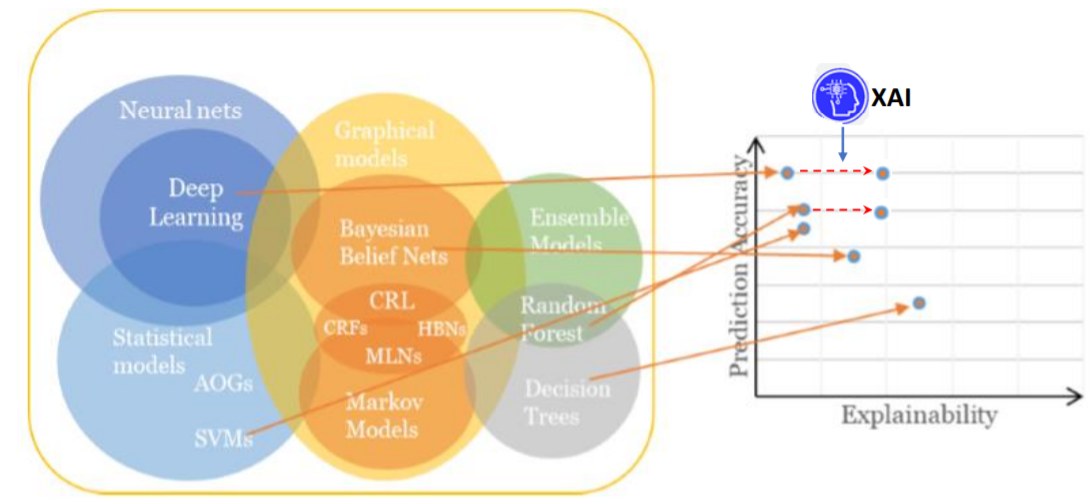
  <figcaption> ML y Explicabilidad (Interpretabilidad). Source:<a href="https://www.iif.com/portals/0/Files/private/32370132_machine_learning_explainability_nov_2018.pdf"> Institute of International Finance</a></figcaption></figure></center> 


Para este caso usaremos la técnica de [SHAP:Shapley Additive exPlanation](https://shap.readthedocs.io/en/latest/index.html) values , basado en los valores de Shapley. Deatalles del respaldo teórico se encuentra en este [enlace](https://github.com/slundberg/shap).

Esta metodología permite: 

+ Identificar la “dirección” de la relación entre las variables de entrada y la variable objetivo. 
+ Evaluar la contribución de las variables a nivel individual y agregado.
+ Identificar no linealidades y cambios estructurales.

In [12]:
# SIMPLE. Enfoque de validación de HoldOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(df_credit.drop(labels=['Default', ], axis=1),df_credit['Default'], test_size=0.1, random_state=0, stratify=df_credit['Default'])

model = RandomForestClassifier(n_estimators=20, random_state=101)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=101)

In [13]:
#! pip install shap
import numpy as np
import shap as shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

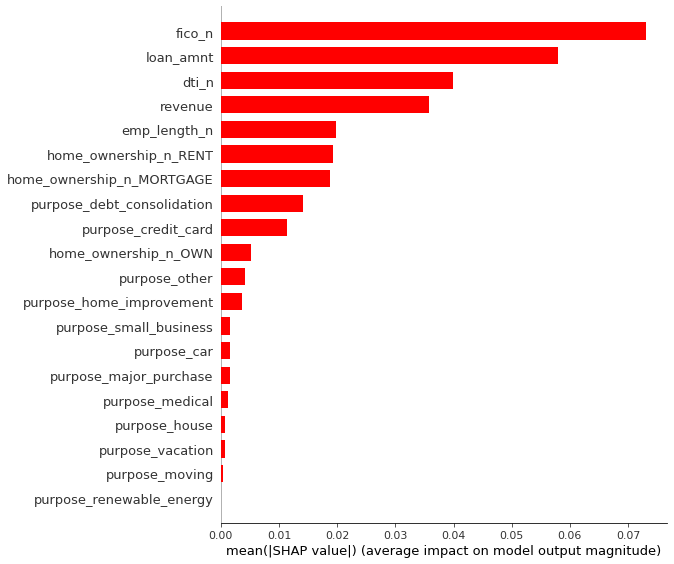

In [14]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar", color='red', show=False)

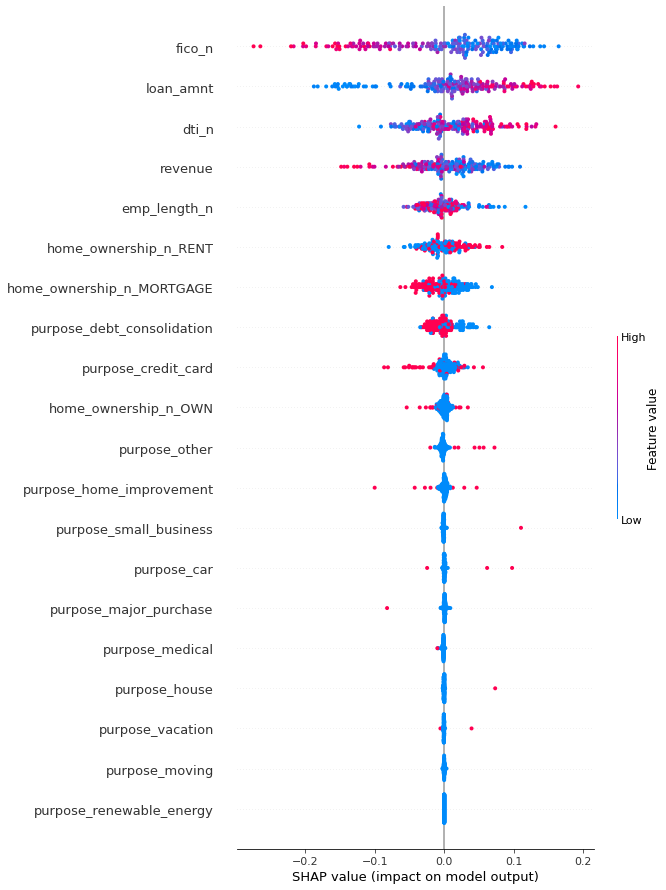

In [32]:
#https://ieeexplore.ieee.org/abstract/document/9050779
import matplotlib.pyplot as plt
shap.summary_plot(shap_values[1], X_test, show=True, plot_size=0.7)

In [ ]:
shap.dependence_plot("loan_amnt", shap_values[1],X_test, interaction_index=None, xmin="percentile(1)", xmax="percentile(99)")
shap.dependence_plot("fico_n", shap_values[1],X_test, interaction_index=None, xmin="percentile(1)", xmax="percentile(99)")
shap.dependence_plot("revenue", shap_values[1],X_test, interaction_index=None, xmin="percentile(1)", xmax="percentile(99)")

In [33]:
shap.initjs(),
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit",out_names='prob')

## Info de la sesión

In [16]:
import session_info
session_info.show()

Algunos resultados sobre todo el dataset de este caso se pueden encontrar en https://ieeexplore.ieee.org/abstract/document/9050779.